Question 1: Load and explore dataset, do necessary pre-processing and split the dataset into training
set and test set with an appropriate ratio. Explain the steps that you have taken (e.g. show
dataset size, dealing with missing values, feature exploration and representation, label
distribution, split dataset etc).

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
# load dataset
df = pd.read_csv('garments_worker_productivity.csv')

In [41]:
# check dataset size
df.shape

(1197, 15)

The dataset contains 1197 rows (or instances) and 15 columns (or features). In other words, there are 1197 observations of employee productivity, with 14 accompanying attributes, and one target variable (actual_productivity) indicating the actual productivity value.

In [42]:
# check missing values in dataset
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

We are missing 506 values in the wip column. We will replace these missing values with the mean of the column.

In [43]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['wip'] = imputer.fit_transform(df[['wip']])

I used a KNN imputer to replace the missing values in the wip column. I chose this imputer because it is a simple and effective way to replace missing values. The KNN imputer replaces missing values with the mean of the k nearest neighbours. I chose k=5 because it is a small number of neighbours, and the dataset is not very large. Also helps because there are correlations between the wip column and other columns, so it is likely that the mean of the nearest neighbours will be a good estimate of the missing value.

In [44]:
# check missing values in dataset
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [45]:
# check the label distribution to see if the dataset is balanced or not
df['actual_productivity'].value_counts()

0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: actual_productivity, Length: 879, dtype: int64

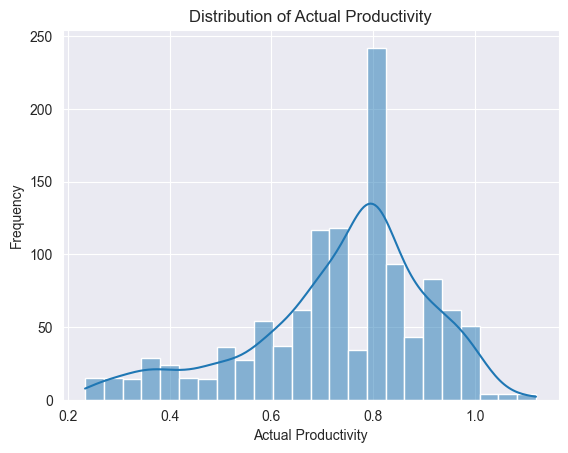

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['actual_productivity'], kde=True)
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Productivity')
plt.show()

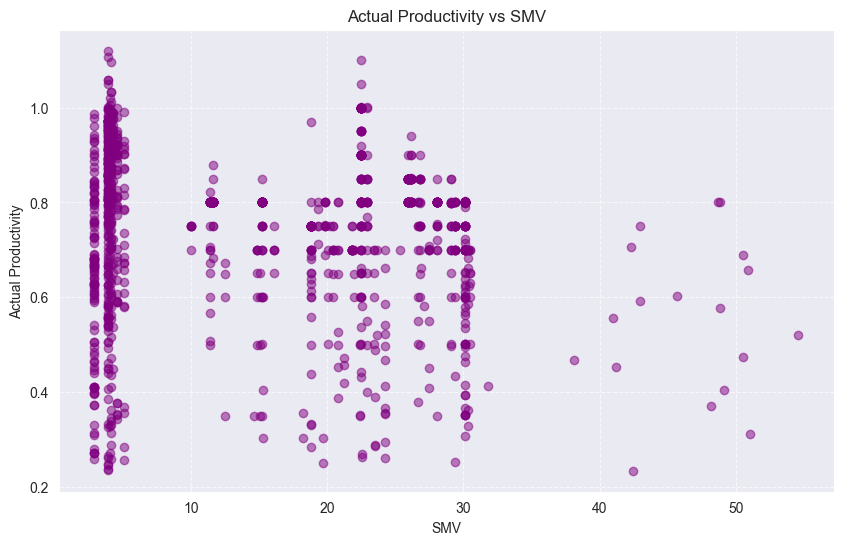

In [47]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with a custom color
plt.scatter(df['smv'], df['actual_productivity'], c='purple', alpha=0.5)

# Set the labels for the axes
plt.xlabel('SMV')
plt.ylabel('Actual Productivity')

# Add a title
plt.title('Actual Productivity vs SMV')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [48]:
# convert categorical features to numerical features via one-hot encoding
df = pd.get_dummies(df, columns=['quarter', 'department', 'day'])

I chose one-hot encoding over label encoding as all the categorical features are nominal, and not ordinal. Label encoding would imply an order to the categories, which is not the case here. Also, the goal of this distinction task is to predict employee productivity, so we can use linear models and tree-based models. Linear models are sensitive to the magnitude of features, so one-hot encoding is a better choice.

In [49]:
# split dataset into training set and test set using a 70:30 ratio
from sklearn.model_selection import train_test_split
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X contains all the feature columns, y contains the label column, test_size specifies the proportion of the data to be used for testing, and random_state ensures that the same random split is used every time the code is run.

We have now pre-processed the dataset, and split it into training and test sets. We can now move onto the next part.

Question 2: Based on the training data, create three supervised machine learning (ML) models for
predicting actual_productivity.
a. Report performance score using a suitable metric on the test data. Is it possible
that the presented result is an underfitted or overfitted one? Justify.
b. Justify different design decisions for each ML model used to answer this
question.
c. Have you optimised any hyper-parameters for each ML model? What are they?
Why have you done that? Explain.
d. Finally, make a recommendation based on the reported results and justify it.

In [51]:
# Standardize the features separately for training and test sets
# Drop non-numeric columns
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])

# Standardize the numerical features separately for train and test data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_num)
X_test_std = scaler.transform(X_test_num)

In [52]:
# use random forest regressor to predict actual_productivity and report performance score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [53]:
model_RFG = RandomForestRegressor(n_estimators=100, random_state=42)

In [54]:
# train the model on the training set
model_RFG.fit(X_train_std, y_train)

RandomForestRegressor(random_state=42)

In [55]:
# predict the actual_productivity on the test set
y_pred = model_RFG.predict(X_test_std) # use the standardised test set for prediction
mse_model1 = mean_squared_error(y_test, y_pred)
print('MSE: ', mse_model1)
rmse_model1 = np.sqrt(mse_model1)
print('RMSE: ', rmse_model1)

MSE:  0.015734140939457082
RMSE:  0.1254358040571235


In [56]:
# include other metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

mae_model1 = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae_model1)
r2_model1 = r2_score(y_test, y_pred)
print('R2: ', r2_model1)

MAE:  0.07642593531913891
R2:  0.47356433208756576


In the context of the employee productivity dataset, an RMSE of 0.1254 could be considered relatively good given the nature of the data and the problem being addressed. The dataset contains various features that might affect employee productivity, such as the type of department, the number of workers, and the daily targets.

The goal of the analysis is to predict employee productivity based on these features. An RMSE of 0.1254 indicates that the model has an average error of 0.1254 units of the target variable (actual_productivity). This means that the model can predict the productivity of employees with reasonable accuracy.

Now let's try ridge regresion as it uses L2 regularization to reduce overfitting by simplifying the model complexity. It will be beneficial to this problem as we have a fairly large number of features.


In [57]:
# use ridge regression to predict actual_productivity and report performance score
from sklearn.linear_model import Ridge

# before we make the model let's find the best alpha value using ridgeCV (which uses cross validation)
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-4, 4, 100) # define a range of alpha values to test

# create a ridgeCV model with the range of alpha values
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

# fit the model on the training set
ridge_cv.fit(X_train_std, y_train)

# find the best alpha value
print('Best alpha value: ', ridge_cv.alpha_)

# store that alpha value in a variable that i can use when creating the model
best_alpha = ridge_cv.alpha_

ridge_model = Ridge(alpha=best_alpha, random_state=42)

Best alpha value:  4.862601580065354


In [58]:
# train the model on the training set
ridge_model.fit(X_train_std, y_train) # use the standardised training set for training

Ridge(alpha=4.862601580065354, random_state=42)

In [59]:
# predict the actual_productivity on the test set using the model
y_pred = ridge_model.predict(X_test_std) # use the standardised test set for prediction
mse_model2 = mean_squared_error(y_test, y_pred)
print('MSE: ', mse_model2)
rmse_model2 = np.sqrt(mse_model2)
print('RMSE: ', rmse_model2)

MSE:  0.023820876131991915
RMSE:  0.15434013130742086


In [60]:
# include other metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

mae_model2 = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae_model2)
r2_model2 = r2_score(y_test, y_pred)
print('R2: ', r2_model2)

MAE:  0.11004122953153256
R2:  0.20299691701902134


In [61]:
# use gradient boosting regressor to predict actual_productivity and report performance score
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

# create the model which is a gradient boosting regressor but first find the best hyperparameters for both the learning rate and estimators
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
    'n_estimators': randint(50,500)
}

# create the model
model_GBR = GradientBoostingRegressor(random_state=42)

# run randomized search to find the best hyperparameters for the model
random_search = RandomizedSearchCV(model_GBR, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002480FF24040>},
                   random_state=42, scoring='neg_mean_squared_error')

In [62]:
# print the best hyperparameters found by the randomized search
print('Best learning rate: ', random_search.best_params_['learning_rate'])
print('Best n_estimators: ', random_search.best_params_['n_estimators'])

Best learning rate:  0.1
Best n_estimators:  137


In [63]:
# create the model with the best hyperparameters
model_GBR = GradientBoostingRegressor(learning_rate=random_search.best_params_['learning_rate'], n_estimators=random_search.best_params_['n_estimators'], random_state=42)

In [64]:
# train the model on the training set
model_GBR.fit(X_train_std, y_train)

GradientBoostingRegressor(n_estimators=137, random_state=42)

In [65]:
# predict the actual_productivity on the test set
y_pred = model_GBR.predict(X_test_std) # use the standardised test set for prediction

In [66]:
# calculate the 4 metrics
mse_model3 = mean_squared_error(y_test, y_pred)
print('MSE: ', mse_model3)
rmse_model3 = np.sqrt(mse_model3)
print('RMSE: ', rmse_model3)
mae_model3 = mean_absolute_error(y_test, y_pred)
print('MAE: ', mae_model3)
r2_model3 = r2_score(y_test, y_pred)
print('R2: ', r2_model3)

MSE:  0.01646436336449015
RMSE:  0.12831353539081583
MAE:  0.0831131179111177
R2:  0.44913242115413143


In [67]:
# put all the metrics in a dataframe for easy comparison
metrics = pd.DataFrame({'MSE': [mse_model1, mse_model2, mse_model3], 'RMSE': [rmse_model1, rmse_model2, rmse_model3], 'MAE': [mae_model1, mae_model2, mae_model3], 'R2': [r2_model1, r2_model2, r2_model3]}, index=['Random Forest', 'Ridge Regression', 'Gradient Boosting'])

In [68]:
# print it out in a nice format using the tabulate library
from tabulate import tabulate
print(tabulate(metrics, headers='keys', tablefmt='psql'))

+-------------------+-----------+----------+-----------+----------+
|                   |       MSE |     RMSE |       MAE |       R2 |
|-------------------+-----------+----------+-----------+----------|
| Random Forest     | 0.0157341 | 0.125436 | 0.0764259 | 0.473564 |
| Ridge Regression  | 0.0238209 | 0.15434  | 0.110041  | 0.202997 |
| Gradient Boosting | 0.0164644 | 0.128314 | 0.0831131 | 0.449132 |
+-------------------+-----------+----------+-----------+----------+


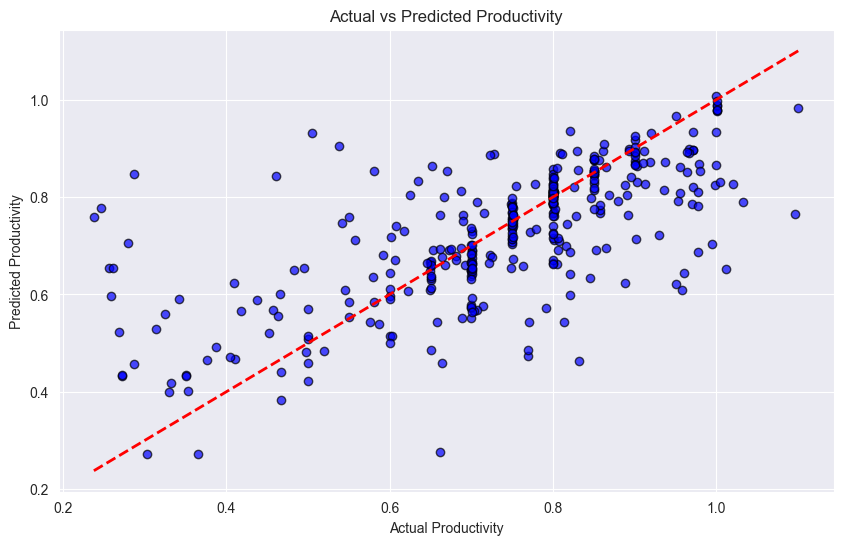

In [69]:
import matplotlib.pyplot as plt

# Set the figure size and create the plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', edgecolors='black', alpha=0.7)
plt.xlabel('Actual Productivity')
plt.ylabel('Predicted Productivity')
plt.title('Actual vs Predicted Productivity')

# Add gridlines to the plot
plt.grid(True)

# Add a diagonal line representing perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

# Show the plot
plt.show()


Random Forest Regressor:

Mean Squared Error (MSE): 0.0157341
Root Mean Squared Error (RMSE): 0.125436
Mean Absolute Error (MAE): 0.0764259
R-squared (R2): 0.473564
The Random Forest Regressor has the lowest MSE, RMSE, and MAE values, which indicates that it is the best-performing model among the three in terms of prediction accuracy. The R2 score is also the highest among the three, which means that this model explains approximately 47.36% of the variance in the actual productivity data.

Ridge Regression:

Mean Squared Error (MSE): 0.0238209
Root Mean Squared Error (RMSE): 0.15434
Mean Absolute Error (MAE): 0.110041
R-squared (R2): 0.202997
The Ridge Regression model has higher MSE, RMSE, and MAE values than the Random Forest Regressor, indicating that its predictions are less accurate. Its R2 score is the lowest among the three models, explaining only about 20.3% of the variance in the actual productivity data. This suggests that Ridge Regression is the weakest model among the three in terms of both prediction accuracy and explanatory power.

Gradient Boosting Regressor:

Mean Squared Error (MSE): 0.0164644
Root Mean Squared Error (RMSE): 0.128314
Mean Absolute Error (MAE): 0.0831131
R-squared (R2): 0.449132
The Gradient Boosting Regressor has slightly higher MSE, RMSE, and MAE values than the Random Forest Regressor, but lower than those of the Ridge Regression model. This suggests that its predictions are less accurate than those of the Random Forest Regressor, but more accurate than those of the Ridge Regression model. Its R2 score is also higher than the Ridge Regression model but lower than the Random Forest Regressor, explaining about 44.91% of the variance in the actual productivity data.

All in all, the Random Forest Regressor is the best-performing model among the three in terms of prediction accuracy and explanatory power. The Gradient Boosting Regressor is the second-best model, while the Ridge Regression model is the weakest model among the three.

Question 3: Analyse the importance of the features for predicting actual_productivity using two
different approaches. Give statistical reasons of your findings

In [70]:
# Feature importance using Random Forest Regressor
# since we have already trained the model, we can just use the feature_importances_ attribute of the model to get the feature importances
importances = model_RFG.feature_importances_

In [71]:
# create a dict to store the feature importances
feature_importances = dict(zip(df.columns[:-1], importances))

In [72]:
# sort the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

In [73]:
# print the feature importances in descending order
for feature, importance in sorted_importances:
    print(f'{feature}: {importance:.4f}')

team: 0.2418
targeted_productivity: 0.1162
over_time: 0.0998
no_of_style_change: 0.0871
wip: 0.0856
date: 0.0822
smv: 0.0434
quarter_Quarter5: 0.0338
quarter_Quarter2: 0.0294
day_Thursday: 0.0196
actual_productivity: 0.0170
day_Monday: 0.0167
department_finishing : 0.0159
day_Saturday: 0.0154
quarter_Quarter1: 0.0151
no_of_workers: 0.0151
idle_time: 0.0116
department_sweing: 0.0112
quarter_Quarter4: 0.0092
quarter_Quarter3: 0.0086
day_Sunday: 0.0084
incentive: 0.0073
idle_men: 0.0052
department_finishing: 0.0045


The higher the value of the feature importance, the more important the feature is in predicting the actual productivity. The top 5 features are:
team: 0.2418
targeted_productivity: 0.1162
over_time: 0.0998
no_of_style_change: 0.0871
wip: 0.0856


The feature importance values obtained from the Random Forest Regressor indicate the relative importance of each feature in predicting the target variable 'actual_productivity'. The values represent the average decrease in impurity (mean squared error, in the case of regression) that each feature causes when used for splitting nodes in the decision trees that make up the Random Forest model.

In [74]:
# use another approach using correlation coefficients to find the most important features in predicting the actual productivity
# create a correlation matrix
corr_matrix = df.corr(numeric_only=True)['actual_productivity'].drop('actual_productivity')

In [75]:
# sort the correlation coefficients
sorted_correlations = corr_matrix.abs().sort_values(ascending=False)

In [76]:
# print the correlation coefficients in descending order
for feature, correlation in sorted_correlations.items():
    print(f'{feature}: {correlation:.4f}')

targeted_productivity: 0.4216
no_of_style_change: 0.2074
idle_men: 0.1817
team: 0.1488
department_finishing : 0.1409
smv: 0.1221
quarter_Quarter5: 0.1020
wip: 0.0884
department_sweing: 0.0876
idle_time: 0.0809
quarter_Quarter3: 0.0802
incentive: 0.0765
quarter_Quarter4: 0.0763
quarter_Quarter1: 0.0619
no_of_workers: 0.0580
over_time: 0.0542
day_Saturday: 0.0415
department_finishing: 0.0359
day_Thursday: 0.0319
quarter_Quarter2: 0.0308
day_Tuesday: 0.0196
day_Sunday: 0.0168
day_Wednesday: 0.0122
day_Monday: 0.0010


The correlation coefficients represent the strength and direction of the linear relationship between each feature and the 'actual_productivity' column. The coefficients range from -1 to 1, where:

A value close to 1 indicates a strong positive relationship. This means that when the feature value increases, the actual productivity tends to increase as well.
A value close to -1 indicates a strong negative relationship. This means that when the feature value increases, the actual productivity tends to decrease.
A value close to 0 indicates little to no relationship between the feature and actual productivity.

Based on the sorted correlations, we can see that targeted_productivity has the highest absolute correlation coefficient of 0.4216, indicating that it is the feature most strongly correlated with the target variable actual_productivity. Similarly, no_of_style_change, and idle_men, team, and department_finishing have relatively high correlation coefficients, suggesting that they are also strongly correlated with the target variable.

On the other hand, some features such as day_Monday, day_Wednesday, day_Sunday, quarter_Quarter2, and day_Thursday have very low correlation coefficients, suggesting that they may not be very strongly correlated with the target variable.